findfont: Font family ['Tahoma'] not found. Falling back to DejaVu Sans.


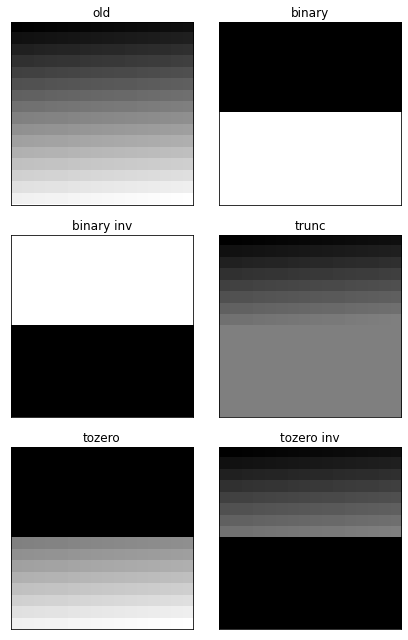

In [2]:
import cv2
import skimage
import random
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from skimage import io

title_thresh = [('binary',cv2.THRESH_BINARY),
                ('binary inv',cv2.THRESH_BINARY_INV),
                ('trunc',cv2.THRESH_TRUNC),
                ('tozero',cv2.THRESH_TOZERO),
                ('tozero inv',cv2.THRESH_TOZERO_INV)]

rup = np.arange(256).reshape(16,16).astype(np.float32)
plt.figure(figsize=[6,9])
plt.subplot(321,xticks=[],yticks=[])
plt.title('old',family='Tahoma')
plt.imshow(rup,cmap='gray')
for i,(title,thresh) in enumerate(title_thresh):
    plt.subplot(322+i,title=title,xticks=[],yticks=[])
    ret,rup_thr = cv2.threshold(rup,127,255,thresh)
    plt.imshow(rup_thr,cmap='gray',vmin=0,vmax=255)
    
plt.tight_layout()
plt.show()

(180, 225, 3)


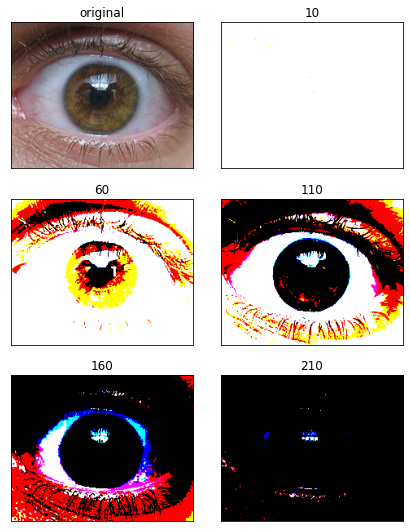

In [6]:
image = plt.imread('Normal/225px-Amber_Brown_Green.jpg') 
print(image.shape)
# pic1 = cv2.imread('Project/Normal/200px-Hazel_green_eye_close_up.jpg',0)
# pic1 = np.array(pic1,dtype=np.float32)
# pic1 = np.array(pic1).astype(np.float32)
# print(pic1)
plt.figure(figsize=[6,7.5])
plt.subplot(321,xticks=[],yticks=[])
plt.title('original',family='Tahoma')
plt.imshow(image,cmap='gray')
for i in range(5):
    ret,rinth = cv2.threshold(image,i*50+10,255,cv2.THRESH_BINARY)
    plt.subplot(322+i,title='%d'%ret,xticks=[],yticks=[])
    plt.imshow(np.real(rinth),cmap='gray')

plt.tight_layout()
plt.show()

(250, 444, 3)


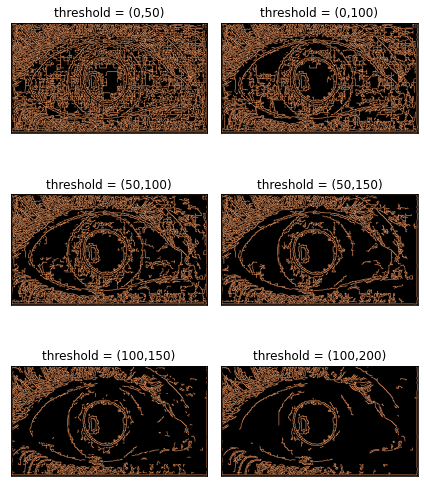

In [3]:
image = plt.imread('Normal/_87edab10-453c-11e7-9f7a-23d54b55bc46.jpg') 
print(image.shape)

plt.figure(figsize=[6,7.5])
thr = [(0,50),(0,100),(50,100),(50,150),(100,150),(100,200)]
for i in range(6):
    plt.subplot(321+i,xticks=[],yticks=[],title='threshold = (%d,%d)'%thr[i])
    carin = cv2.Canny(image,thr[i][0],thr[i][1])
    plt.imshow(carin,cmap='copper')

plt.tight_layout()
plt.show()

(414, 621, 3)


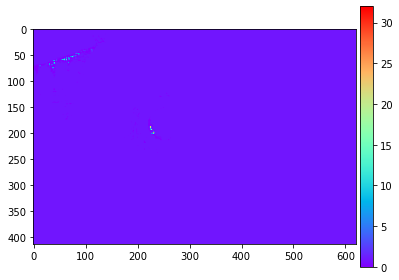

In [9]:
image = plt.imread('./Pter.jpg') 
print(image.shape)
_,thresh = cv2.threshold(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY),10,255,0)
n,lek = cv2.connectedComponents(thresh)
plt.imshow(lek,cmap='rainbow')
plt.colorbar(pad=0.01)
plt.tight_layout()
plt.show()

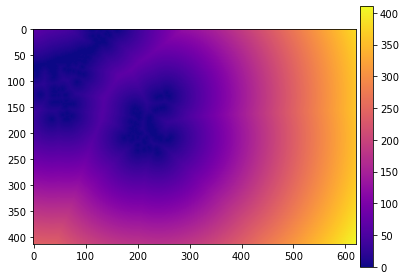

In [10]:
depth = cv2.distanceTransform(thresh,cv2.DIST_L2,0)
plt.imshow(depth,cmap='plasma')
plt.colorbar(pad=0.01)
plt.tight_layout()
plt.show()

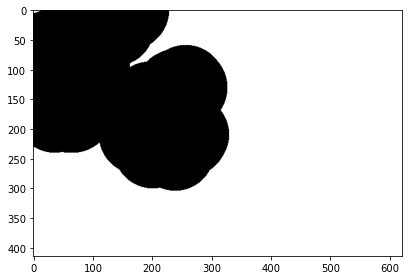

In [11]:
obj = np.where(depth>depth.max()*0.16,1,0)
plt.imshow(obj,cmap='gray')
plt.tight_layout()
plt.show()

In [9]:
image = plt.imread('Normal/_87edab10-453c-11e7-9f7a-23d54b55bc46.jpg') 
print(image.shape)
image_gr = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # แปลงเป็นขาวดำ
_,image_thr = cv2.threshold(image_gr,10,255,0)
# หาเส้นเค้าโครง
contour,_ = cv2.findContours(image_thr,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
# วาดเส้นเค้าโครงลงบนภาพเดิม
for i in range(len(contour)):
    image = cv2.drawContours(image,contour,i,(0,200,0),2)
cv2.imwrite('sample01.jpg',image)

(250, 444, 3)


True

In [10]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(250, 444, 3)


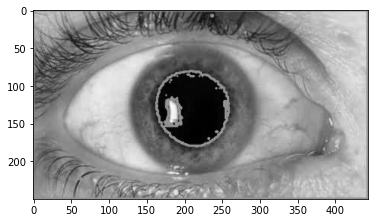

In [11]:
image = plt.imread('Normal/_87edab10-453c-11e7-9f7a-23d54b55bc46.jpg') 
print(image.shape)
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')


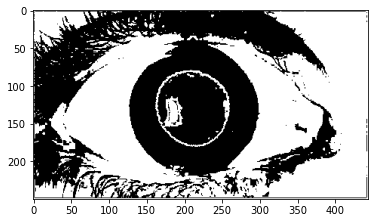

In [12]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

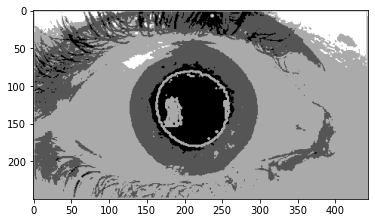

In [13]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [14]:
pic = plt.imread('Normal/_87edab10-453c-11e7-9f7a-23d54b55bc46.jpg') 
print(pic.shape)
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(250, 444, 3)


(111000, 3)

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

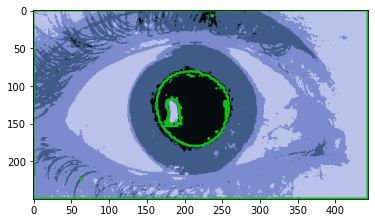

In [16]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow((cluster_pic).astype(np.uint8))

(250, 474, 3)


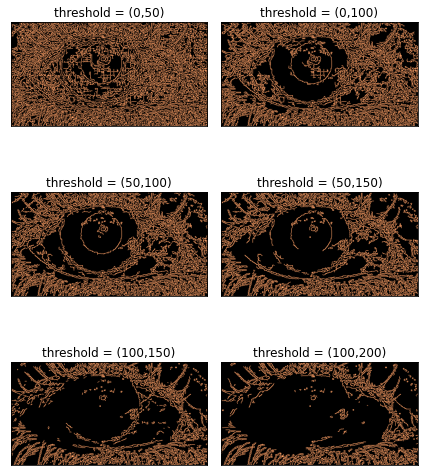

In [18]:
image = plt.imread('Pin.jpg') 
print(image.shape)

plt.figure(figsize=[6,7.5])
thr = [(0,50),(0,100),(50,100),(50,150),(100,150),(100,200)]
for i in range(6):
    plt.subplot(321+i,xticks=[],yticks=[],title='threshold = (%d,%d)'%thr[i])
    carin = cv2.Canny(image,thr[i][0],thr[i][1])
    plt.imshow(carin,cmap='copper')

plt.tight_layout()
plt.show()

(150, 200, 3)


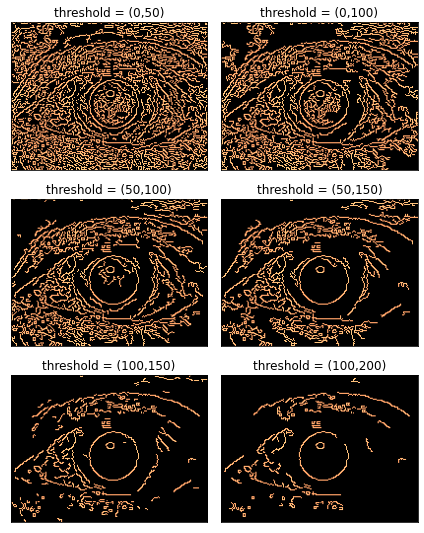

In [19]:
image = plt.imread('Cat.jpg') 
print(image.shape)

plt.figure(figsize=[6,7.5])
thr = [(0,50),(0,100),(50,100),(50,150),(100,150),(100,200)]
for i in range(6):
    plt.subplot(321+i,xticks=[],yticks=[],title='threshold = (%d,%d)'%thr[i])
    carin = cv2.Canny(image,thr[i][0],thr[i][1])
    plt.imshow(carin,cmap='copper')

plt.tight_layout()
plt.show()

(414, 621, 3)


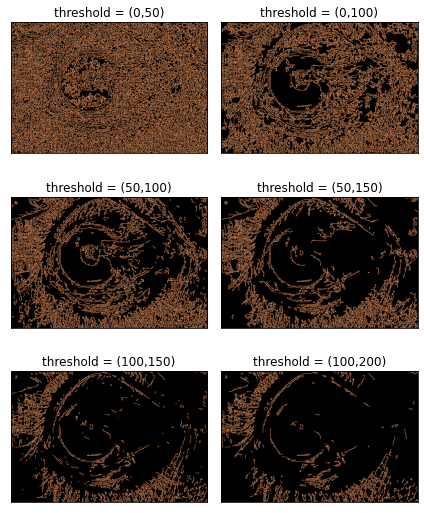

In [20]:
image = plt.imread('Pter.jpg') 
print(image.shape)

plt.figure(figsize=[6,7.5])
thr = [(0,50),(0,100),(50,100),(50,150),(100,150),(100,200)]
for i in range(6):
    plt.subplot(321+i,xticks=[],yticks=[],title='threshold = (%d,%d)'%thr[i])
    carin = cv2.Canny(image,thr[i][0],thr[i][1])
    plt.imshow(carin,cmap='copper')

plt.tight_layout()
plt.show()

(150, 200, 3)


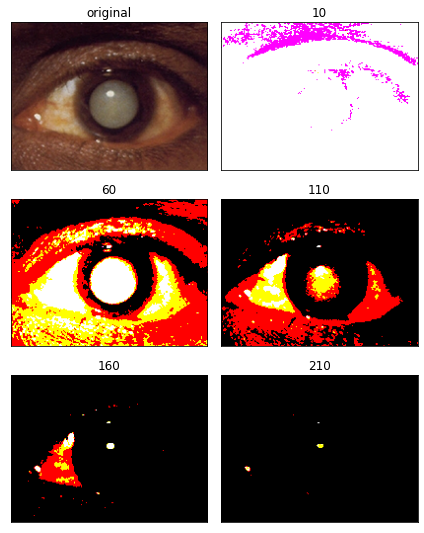

In [7]:
image = plt.imread('Cat.jpg') 
print(image.shape)
# pic1 = cv2.imread('Project/Normal/200px-Hazel_green_eye_close_up.jpg',0)
# pic1 = np.array(pic1,dtype=np.float32)
# pic1 = np.array(pic1).astype(np.float32)
# print(pic1)
plt.figure(figsize=[6,7.5])
plt.subplot(321,xticks=[],yticks=[])
plt.title('original',family='Tahoma')
plt.imshow(image,cmap='gray')
for i in range(5):
    ret,rinth = cv2.threshold(image,i*50+10,255,cv2.THRESH_BINARY)
    plt.subplot(322+i,title='%d'%ret,xticks=[],yticks=[])
    plt.imshow(np.real(rinth),cmap='gray')

plt.tight_layout()
plt.show()

(414, 621, 3)


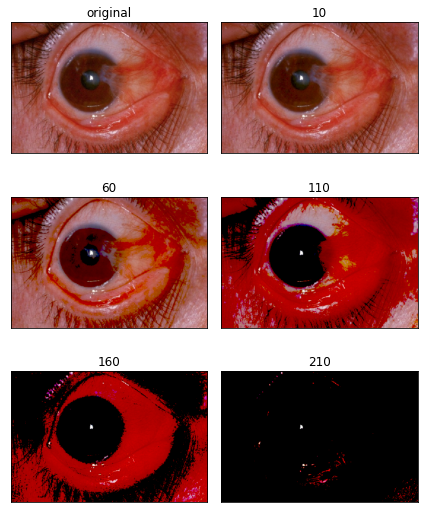

In [27]:
image = plt.imread('Pter.jpg') 
print(image.shape)
# pic1 = cv2.imread('Project/Normal/200px-Hazel_green_eye_close_up.jpg',0)
# pic1 = np.array(pic1,dtype=np.float32)
# pic1 = np.array(pic1).astype(np.float32)
# print(pic1)
plt.figure(figsize=[6,7.5])
plt.subplot(321,xticks=[],yticks=[])
plt.title('original',family='Tahoma')
plt.imshow(image,cmap='gray')
for i in range(5):
    ret,rinth = cv2.threshold(image,i*50+10,255,cv2.THRESH_TOZERO)
    plt.subplot(322+i,title='%d'%ret,xticks=[],yticks=[])
    plt.imshow(np.real(rinth),cmap='gray')

plt.tight_layout()
plt.show()

(250, 474, 3)


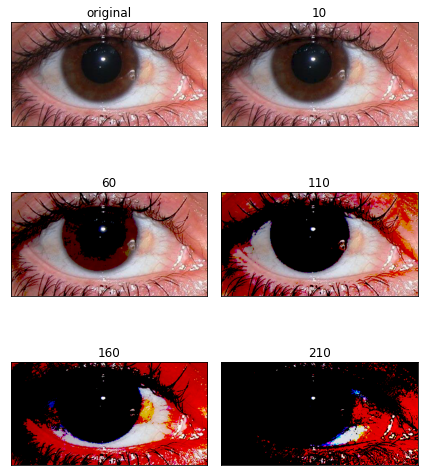

In [26]:
image = plt.imread('Pin.jpg') 
print(image.shape)
# pic1 = cv2.imread('Project/Normal/200px-Hazel_green_eye_close_up.jpg',0)
# pic1 = np.array(pic1,dtype=np.float32)
# pic1 = np.array(pic1).astype(np.float32)
# print(pic1)
plt.figure(figsize=[6,7.5])
plt.subplot(321,xticks=[],yticks=[])
plt.title('original',family='Tahoma')
plt.imshow(image,cmap='gray')
for i in range(5):
    ret,rinth = cv2.threshold(image,i*50+10,255,cv2.THRESH_TOZERO)
    plt.subplot(322+i,title='%d'%ret,xticks=[],yticks=[])
    plt.imshow(np.real(rinth),cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
#save the image(i) in the same directory
img = plt.imread("face.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()